**Fase 1: Exploración y Limpieza**

1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
  
- Une los dos conjuntos de datos de la forma más eficiente.

In [481]:
# 1. Instalación de bibliotecas: 


import pandas as pd 
import numpy as np 
from IPython.display import display #He añadido esta para poder ver el dataframe dentro de la función

In [482]:
# 2. Exploración inicial de los datos de Customer Flight Activity

# Primero hago el proceso de exploración y análisis de la primera base de datos

def explorar_dataset(filepath, index_col=0, n=5):  #filepath: Ruta del archivo CSV a cargar.
     
    # Lectura del dataset
    
    df = pd.read_csv('Customer_Flight_Activity.csv', index_col=index_col)

    
    df.reset_index(inplace=True)  # Esto convierte el índice actual en una columna y asigna un nuevo índice
    
    # Eliminación de la columna del índice 
    if isinstance(index_col, int):
        print(f"Usando la columna {index_col} como índice.")
    elif isinstance(index_col, str):
        print(f"Usando la columna '{index_col}' como índice.")
    

     # Desactivar la visualización del índice al imprimir
    pd.set_option('display.show_dimensions', False)
    
    # Tamaño y estructura del DataFrame
    print("\n--- Información general del DataFrame ---")
    df.info()  
    print("\nPrimeras filas del DataFrame:")
    display(df.head(n))  
    print("\nFilas aleatorias del DataFrame:")
    display(df.sample(n))  
    print(f"\nTamaño del dataset: {df.size} elementos")
    print(f"Forma del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

    # Exploración de columnas
    print("\n--- Información sobre las columnas ---")
    pd.set_option('display.max_columns', None)  # Ver todas las columnas
    print(f"Columnas del dataset: {df.columns.tolist()}")
    print("\nConteo de valores no nulos por columna:")
    print(df.count())  # Conteo de valores no nulos por columna

    # Devolución del DataFrame para posibles análisis adicionales
    return df




In [483]:
ruta = 'Customer_Flight_Activity.csv'
dataset = explorar_dataset(ruta, index_col=0, n=5)

Usando la columna 0 como índice.

--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

Primeras filas del DataFrame:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0



Filas aleatorias del DataFrame:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
74767,482525,2017,5,14,3,17,2839,283.00,0,0
334463,874267,2017,10,11,6,17,1785,178.00,549,44
73618,422750,2017,5,0,0,0,0,0.00,0,0
16256,966059,2017,1,11,0,11,2299,229.00,0,0
238000,780504,2018,3,14,1,15,2325,250.56,0,0



Tamaño del dataset: 4056240 elementos
Forma del dataset: 405624 filas, 10 columnas

--- Información sobre las columnas ---
Columnas del dataset: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Conteo de valores no nulos por columna:
Loyalty Number                 405624
Year                           405624
Month                          405624
Flights Booked                 405624
Flights with Companions        405624
Total Flights                  405624
Distance                       405624
Points Accumulated             405624
Points Redeemed                405624
Dollar Cost Points Redeemed    405624
dtype: int64


In [514]:
# Estandarizo los nombres de las columnas del DataFrame con una sola función:

def estandarizar_columnas(dataset):
    
    dataset.columns = dataset.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r'[^\w\s]', '', regex=True)
    print(f"Nombres de columnas estandarizados: {dataset.columns.tolist()}")
    return dataset

estandarizar_columnas(dataset)

Nombres de columnas estandarizados: ['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [ ]:
# Calculo y muestro la cantidad de valores únicos por columna.

def valores_unicos_por_columna(dataset):
    
    print("\n--- Valores únicos por columna ---")
    valores_unicos = {col: len(dataset[col].unique()) for col in dataset.columns}
    valores_unicos_df = pd.DataFrame(
        list(valores_unicos.items()),
        columns=['Columna', 'Valores únicos']
    )
    display(valores_unicos_df)
    return valores_unicos_df


valores_unicos = valores_unicos_por_columna(dataset)


--- Valores únicos por columna ---


,Columna,Valores únicos
0,loyalty_number,16737
1,year,2
2,month,12
3,flights_booked,22
4,flights_with_companions,12
5,total_flights,33
6,distance,4746
7,points_accumulated,1549
8,points_redeemed,587
9,dollar_cost_points_redeemed,49


In [486]:
# Esta función procesa las columnas numéricas y muestra estadísticas del DataFrame.

def procesar_columnas_numericas(dataset, columnas_numericas=None):
    
    # Si no se especifican columnas, detectarlas automáticamente
    if columnas_numericas is None:
        columnas_numericas = dataset.select_dtypes(include='number').columns.tolist()
        print(f"\nColumnas numéricas detectadas automáticamente: {columnas_numericas}")
    
    # Creo un diccionario para almacenar las estadísticas de cada columna
    estadisticas = {}
    
    # Procesar solo las columnas especificadas
    for columna in columnas_numericas:
        if columna in dataset.columns:
            # Calcular estadísticas para la columna
            stats = dataset[columna].describe()
            estadisticas[columna] = stats
            
            # Filtrar valores negativos
            if (dataset[columna] < 0).any():
                print(f"\nSe encontraron valores negativos en '{columna}', filtrando...")
                dataset = df[df[columna] >= 0]
        else:
            print(f"\nLa columna '{columna}' no existe en el DataFrame.")
    
    # Convertir el diccionario de estadísticas en un DataFrame
    df_estadisticas = pd.DataFrame(estadisticas)
    print("\nEstadísticas descriptivas:")
    print(df_estadisticas.T)  # Transponer para que las columnas sean filas
    
    return df

# Especifico las columnas que quiero procesar
columnas_a_procesar = [
    'flights_booked', 
    'flights_with_companions', 
    'total_flights', 
    'distance', 
    'points_accumulated', 
    'points_redeemed', 
    'dollar_cost_points_redeemed'
]

# Llamo a la función con las columnas deseadas
df_procesado = procesar_columnas_numericas(dataset, columnas_numericas=columnas_a_procesar)



Estadísticas descriptivas:
                                count         mean          std  min  25%  \
flights_booked               405624.0     4.115052     5.225518  0.0  0.0   
flights_with_companions      405624.0     1.031805     2.076869  0.0  0.0   
total_flights                405624.0     5.146858     6.521227  0.0  0.0   
distance                     405624.0  1208.880059  1433.155320  0.0  0.0   
points_accumulated           405624.0   123.692721   146.599831  0.0  0.0   
points_redeemed              405624.0    30.696872   125.486049  0.0  0.0   
dollar_cost_points_redeemed  405624.0     2.484503    10.150038  0.0  0.0   

                               50%     75%     max  
flights_booked                 1.0     8.0    21.0  
flights_with_companions        0.0     1.0    11.0  
total_flights                  1.0    10.0    32.0  
distance                     488.0  2336.0  6293.0  
points_accumulated            50.0   239.0   676.5  
points_redeemed                0.0   

In [487]:
dataset.head(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [488]:
# 3. Exploración inicial de los datos de Customer Loyalty History usando la misma función que en la anterior base de datos

def explorar_dataset(filepath, index_col=0, n=5):
    
    # Lectura del dataset
    df_2 = pd.read_csv('Customer_Loyalty_History.csv', index_col=index_col)

    # Restablece el índice para convertirlo en una columna normal
    df_2.reset_index(inplace=True)  # Esto convierte el índice actual en una columna y asigna un nuevo índice
    
    # Elimina la columna del índice (si es necesario)
    if isinstance(index_col, int):
        print(f"Usando la columna {index_col} como índice.")
    elif isinstance(index_col, str):
        print(f"Usando la columna '{index_col}' como índice.")

     # Desactiva la visualización del índice al imprimir
    pd.set_option('display.show_dimensions', False)
    
    # Tamaño y estructura del DataFrame
    print("\n--- Información general del DataFrame ---")
    df_2.info()  
    print("\nPrimeras filas del DataFrame:")
    display(df_2.head(n))  
    print("\nFilas aleatorias del DataFrame:")
    display(df_2.sample(n))  
    print(f"\nTamaño del dataset: {df_2.size} elementos")
    print(f"Forma del dataset: {df_2.shape[0]} filas, {df_2.shape[1]} columnas")

    # Exploración de columnas
    print("\n--- Información sobre las columnas ---")
    pd.set_option('display.max_columns', None)  # Ver todas las columnas
    print(f"Columnas del dataset: {df_2.columns.tolist()}")
    print("\nConteo de valores no nulos por columna:")
    print(df_2.count())  # Conteo de valores no nulos por columna

    # Retorna el DataFrame para posibles análisis adicionales
    return df_2

# Uso de la función
ruta_2 = 'Customer_Loyalty_History.csv'
dataset_2 = explorar_dataset(ruta, index_col=0, n=5)

Usando la columna 0 como índice.

--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 n

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



Filas aleatorias del DataFrame:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
7906,327498,Canada,Alberta,Peace River,T9O 2W2,Male,Bachelor,64702.0,Divorced,Nova,7956.15,Standard,2016,1,2016.0,9.0
804,342738,Canada,Nova Scotia,Halifax,B3C 2M8,Male,College,NaN,Married,Aurora,5028.84,Standard,2014,4,2014.0,12.0
2542,840515,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,49224.0,Married,Aurora,8355.96,Standard,2012,9,NaN,NaN
2700,426439,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,79913.0,Married,Aurora,8652.65,Standard,2012,6,NaN,NaN
6181,666417,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,98417.0,Married,Nova,4881.39,Standard,2015,8,NaN,NaN



Tamaño del dataset: 267792 elementos
Forma del dataset: 16737 filas, 16 columnas

--- Información sobre las columnas ---
Columnas del dataset: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Conteo de valores no nulos por columna:
Loyalty Number        16737
Country               16737
Province              16737
City                  16737
Postal Code           16737
Gender                16737
Education             16737
Salary                12499
Marital Status        16737
Loyalty Card          16737
CLV                   16737
Enrollment Type       16737
Enrollment Year       16737
Enrollment Month      16737
Cancellation Year      2067
Cancellation Month     2067
dtype: int64


In [515]:
# Estandarizo los nombres de las columnas del DataFrame con una sola función:

def estandarizar_columnas(dataset_2):
    """Estandariza los nombres de las columnas del DataFrame."""
    dataset_2.columns = dataset_2.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r'[^\w\s]', '', regex=True)
    print(f"Nombres de columnas estandarizados: {dataset_2.columns.tolist()}")
    return dataset_2


estandarizar_columnas(dataset_2)

Nombres de columnas estandarizados: ['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [516]:
# Calculo y muestro la cantidad de valores únicos por columna.

def valores_unicos_por_columna(dataset_2):
    """Calcula y muestra la cantidad de valores únicos por columna."""
    print("\n--- Valores únicos por columna ---")
    valores_unicos = {col: len(dataset_2[col].unique()) for col in dataset_2.columns}
    valores_unicos_df_2 = pd.DataFrame(
        list(valores_unicos.items()),
        columns=['Columna', 'Valores únicos']
    )
    display(valores_unicos_df_2)
    return valores_unicos_df_2


valores_unicos = valores_unicos_por_columna(dataset_2)


--- Valores únicos por columna ---


,Columna,Valores únicos
0,loyalty_number,16737
1,country,1
2,province,11
3,city,29
4,postal_code,55
5,gender,2
6,education,5
7,salary,5891
8,marital_status,3
9,loyalty_card,3


In [491]:
# Esta función procesa las columnas numéricas y muestra estadísticas del DataFrame según las columnas que quiero analizar. En este caso salary y clv.


def procesar_columnas_numericas(dataset_2, columnas_numericas=None):
    """Procesa las columnas numéricas del DataFrame y muestra estadísticas con describe()."""
    # Si no se especifican columnas, detectarlas automáticamente
    if columnas_numericas is None:
        columnas_numericas = dataset_2.select_dtypes(include='number').columns.tolist()
        print(f"\nColumnas numéricas detectadas automáticamente: {columnas_numericas}")
    
    # Procesar solo las columnas especificadas
    for columna in columnas_numericas:
        if columna in dataset_2.columns:
            print(f"\nEstadísticas de la columna '{columna}':")
            print(dataset_2[columna].describe())
            
            # Filtrar valores negativos
            if (dataset_2[columna] < 0).any():
                print(f"\nSe encontraron valores negativos en '{columna}', filtrando...")
                df = dataset_2[dataset_2[columna] >= 0]
        else:
            print(f"\nLa columna '{columna}' no existe en el DataFrame.")
    
    return dataset_2

# Especificar las columnas que quieres procesar
columnas_a_procesar = [ 'salary', 'clv' ]

# Llamar a la función con las columnas deseadas
df_procesado2 = procesar_columnas_numericas(dataset_2, columnas_numericas=columnas_a_procesar)


Estadísticas de la columna 'salary':
count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: salary, dtype: float64

Se encontraron valores negativos en 'salary', filtrando...

Estadísticas de la columna 'clv':
count    16737.000000
mean      7988.896536
std       6860.982280
min       1898.010000
25%       3980.840000
50%       5780.180000
75%       8940.580000
max      83325.380000
Name: clv, dtype: float64


In [492]:
def estadisticas_numericas(dataset_2, columnas=None):
 
    # Seleccionar columnas numéricas especificadas o todas si no se indican
    if columnas is not None:
        columnas_existentes = [col for col in columnas if col in dataset_2.columns]
        if not columnas_existentes:
            raise ValueError("Ninguna de las columnas especificadas existe en el DataFrame.")
        dataset_2 = dataset_2[columnas_existentes]
        print(f"Analizando las siguientes columnas numéricas: {columnas_existentes}")
    else:
        print("Analizando todas las columnas numéricas del DataFrame.")

    # Calcular estadísticas descriptivas
    estadisticas = dataset_2.select_dtypes(include='number').describe()
    estadisticas_transpuestas = estadisticas.T

    print("\n--- Estadísticas descriptivas de variables numéricas ---")
    display(estadisticas)

    print("\n--- Estadísticas descriptivas transpuestas (numéricas) ---")
    display(estadisticas_transpuestas)

    return {
        'estadisticas': estadisticas,
        'estadisticas_transpuestas': estadisticas_transpuestas
    }

# Ejemplo de uso
estadisticas_num = estadisticas_numericas(dataset_2, columnas=['salary', 'clv'])

Analizando las siguientes columnas numéricas: ['salary', 'clv']

--- Estadísticas descriptivas de variables numéricas ---


,salary,clv
count,12499.000000,16737.000000
mean,79245.609409,7988.896536
std,35008.297285,6860.982280
min,-58486.000000,1898.010000
25%,59246.500000,3980.840000
50%,73455.000000,5780.180000
75%,88517.500000,8940.580000
max,407228.000000,83325.380000



--- Estadísticas descriptivas transpuestas (numéricas) ---


,count,mean,std,min,25%,50%,75%,max
salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
clv,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38


In [460]:
def frecuencias_categoricas(dataset_2):
    """Calcula y muestra la frecuencia de valores únicos en columnas categóricas."""
    print("\n--- Frecuencia de valores únicos en columnas categóricas ---")
    frecuencias_categoricas = []
    for col in dataset_2.select_dtypes(include='object').columns:
        frecuencias = dataset_2[col].value_counts().reset_index()
        frecuencias.columns = ['Valor', 'Frecuencia']
        frecuencias['Columna'] = col
        frecuencias_categoricas.append(frecuencias)

    if frecuencias_categoricas:
        frecuencias_categoricas_df = pd.concat(frecuencias_categoricas, ignore_index=True)
        display(frecuencias_categoricas_df)
        return frecuencias_categoricas_df
    else:
        print("No se encontraron columnas categóricas.")
        return None
    
frecuencias = frecuencias_categoricas(dataset_2)


--- Frecuencia de valores únicos en columnas categóricas ---


,Valor,Frecuencia,Columna
0,Canada,16737,country
1,Ontario,5404,province
2,British Columbia,4409,province
3,Quebec,3300,province
4,Alberta,969,province
...,...,...,...
106,Star,7637,loyalty_card
107,Nova,5671,loyalty_card
108,Aurora,3429,loyalty_card
109,Standard,15766,enrollment_type


In [493]:
def estadisticas_descriptivas(dataset_2):
   
    print("\n--- Estadísticas descriptivas de variables categóricas ---")
    estadisticas_categoricas = dataset_2.describe(include=[object])
    display(estadisticas_categoricas)

    return {'estadisticas_categoricas': estadisticas_categoricas }


estadisticas = estadisticas_descriptivas(dataset_2)



--- Estadísticas descriptivas de variables categóricas ---


,country,province,city,postal_code,gender,education,marital_status,loyalty_card,enrollment_type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


In [494]:
# 3. Unión conjunto de datos: 


df_unido = pd.merge(dataset_2, dataset, on='loyalty_number', how='inner')


# He decidido unit la segunda tabla con la primera, para ver primero la información del cliente y luego su historial.


In [495]:
df_unido.sample(10)


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
58148,797714,Canada,Ontario,Toronto,P5S 6R4,Male,Bachelor,95877.0,Married,Aurora,8026.28,Standard,2015,4,NaN,NaN,2018,9,0,0,0,0,0.0,0,0
139756,389146,Canada,British Columbia,Kelowna,V09 2E9,Female,Bachelor,54643.0,Single,Nova,4305.79,Standard,2015,4,NaN,NaN,2017,5,0,0,0,0,0.0,0,0
112444,604526,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,102715.0,Married,Nova,2938.81,Standard,2014,10,NaN,NaN,2017,6,12,0,12,3240,324.0,0,0
19533,633999,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,83735.0,Married,Aurora,5028.58,Standard,2017,12,NaN,NaN,2018,10,5,0,5,3380,338.0,0,0
338035,252472,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,87086.0,Married,Nova,3808.12,2018 Promotion,2018,3,NaN,NaN,2018,8,0,0,0,0,0.0,0,0
339293,862576,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,91239.0,Married,Star,5838.90,Standard,2016,3,NaN,NaN,2017,6,4,1,5,4380,438.0,0,0
38576,114493,Canada,Ontario,Toronto,P5S 6R4,Female,Bachelor,47036.0,Single,Aurora,6063.20,Standard,2016,4,NaN,NaN,2017,10,0,0,0,0,0.0,0,0
130228,196016,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,100185.0,Married,Nova,3713.80,Standard,2012,11,NaN,NaN,2017,6,0,0,0,0,0.0,0,0
370844,459223,Canada,Manitoba,Winnipeg,R6Y 4T5,Male,College,NaN,Married,Star,8841.77,Standard,2012,6,NaN,NaN,2018,9,4,0,4,1268,126.0,0,0
303432,579015,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,80697.0,Married,Star,3919.37,Standard,2017,5,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


2. Limpieza de Datos:
   
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
  
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
  
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [496]:
def identificar_nulos(df_unido):
    """
    Identifica los valores nulos en el DataFrame y devuelve un resumen en forma de DataFrame.
    
    Parámetros:
    - df: DataFrame a analizar.
    
    Retorna:
    - Un DataFrame con el resumen y porcentaje de valores nulos por columna.
    """
    # Calcular valores nulos y porcentaje de nulos
    resumen_nulos = df_unido.isnull().sum()
    porcentaje_nulos = df_unido.isnull().mean() * 100
    
    # Crear el DataFrame resumen
    resumen_df = pd.DataFrame({
        'Valores Nulos': resumen_nulos,
        'Porcentaje Nulos (%)': porcentaje_nulos
    }).reset_index()
    resumen_df.columns = ['Columna', 'Valores Nulos', 'Porcentaje Nulos (%)']
    
    # Filtrar columnas con valores nulos
    resumen_con_nulos = resumen_df[resumen_df['Valores Nulos'] > 0]
    
    # Mostrar el resumen directamente
    print("\n--- Resumen de columnas con valores nulos y porcentajes ---")
    display(resumen_con_nulos)

    return resumen_con_nulos


resumen_nulos_df = identificar_nulos(df_unido)



--- Resumen de columnas con valores nulos y porcentajes ---


,Columna,Valores Nulos,Porcentaje Nulos (%)
7,salary,102672,25.312112
14,cancellation_year,355560,87.657535
15,cancellation_month,355560,87.657535



Procesando columna numérica: salary (25.31% de nulos)
- Analizando distribución para imputación.


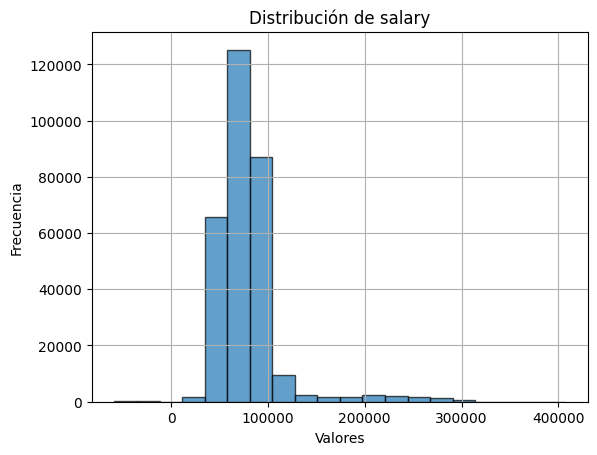

- Distribución asimétrica. Imputando con la mediana.


In [497]:
# Dado que hay dos tipos de nulos, en el caso de la columna de salario, he decidido procesarlo con la siguiente función: 

import matplotlib.pyplot as plt

def gestionar_nulos_numericos(df_unido, columnas_numericas=['salary'], umbral_alto=30):
    """
    Gestiona los valores nulos en columnas numéricas.
    
    Parámetros:
    - df: DataFrame a procesar.
    - columnas_numericas: Lista de columnas numéricas (opcional).
    - umbral_alto: Porcentaje considerado como "alto" para valores nulos.
    
    Retorna:
    - DataFrame con los nulos gestionados en columnas numéricas.
    """
    columnas_numericas = columnas_numericas or df_unido.select_dtypes(include='number').columns.tolist()

    for col in columnas_numericas:
        porcentaje_nulos = df_unido[col].isnull().mean() * 100
        print(f"\nProcesando columna numérica: {col} ({porcentaje_nulos:.2f}% de nulos)")

        if porcentaje_nulos > umbral_alto:
            print("- Eliminando la columna por alto porcentaje de nulos.")
            df_unido = df_unido.drop(columns=[col])
        else:
            print("- Analizando distribución para imputación.")
            df_unido[col].hist(bins=20, edgecolor='black', alpha=0.7)
            plt.title(f"Distribución de {col}")
            plt.xlabel("Valores")
            plt.ylabel("Frecuencia")
            plt.show()

            skewness = df_unido[col].skew()
            if abs(skewness) < 0.5:  # Distribución simétrica
                print("- Distribución simétrica. Imputando con la media.")
                df_unido[col] = df_unido[col].fillna(df_unido[col].mean())
            else:  # Distribución asimétrica
                print("- Distribución asimétrica. Imputando con la mediana.")
                df_unido[col] = df_unido[col].fillna(df_unido[col].median())

    return df_unido

df_corregido = gestionar_nulos_numericos(df_unido, umbral_alto=30)

In [498]:
def procesar_columnas(df_corregido, columnas_active=['cancellation_month', 'cancellation_year']):
    # Diccionario para mapear números a nombres de meses
    months = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April',
        5: 'May', 6: 'June', 7: 'July', 8: 'August',
        9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }

    # Asegurarnos de que 'cancellation_year' y 'cancellation_month' solo contienen valores numéricos
    df_corregido['cancellation_year'] = pd.to_numeric(df_corregido['cancellation_year'], errors='coerce')
    df_corregido['cancellation_month'] = pd.to_numeric(df_corregido['cancellation_month'], errors='coerce')

    # Rellenar los nulos con 0 en 'cancellation_year' y 'cancellation_month'
    df_corregido['cancellation_year'] = df_corregido['cancellation_year'].fillna(0).astype(int)
    df_corregido['cancellation_month'] = df_corregido['cancellation_month'].fillna(0).astype(int)

    # Reemplazar 0 en 'cancellation_year' por NaN (no cancelado)
    df_corregido["cancellation_year"] = df_corregido["cancellation_year"].replace(0, np.nan)
    
    # Convertir 'month', 'enrollment_month' y 'cancellation_month' a nombres de meses
    df_corregido['month'] = df_corregido['month'].map(months)
    df_corregido['enrollment_month'] = df_corregido['enrollment_month'].map(months)
    df_corregido['cancellation_month'] = df_corregido['cancellation_month'].map(months)

    # Rellenar los valores nulos con 'Active' en las columnas especificadas
    df_corregido[columnas_active] = df_corregido[columnas_active].fillna('Active')

    return df_corregido

# Llamar a la función y pasar las columnas donde quieres reemplazar nulos con 'Active'
df_corregido = procesar_columnas(df_corregido, columnas_active=['cancellation_month', 'cancellation_year'])


In [499]:
# Elimino columna country ya que es el mismo en toda la tabla

df_corregido.drop('country', axis=1, inplace=True)

In [500]:
df_corregido.sample(10)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
206114,335162,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,104619.0,Married,Nova,9124.60,Standard,2013,October,Active,Active,2017,March,2,0,2,2590,259.0,0,0
38470,772395,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,55564.0,Divorced,Aurora,6052.00,Standard,2018,January,Active,Active,2018,November,4,0,4,1348,134.0,0,0
233174,595083,Quebec,Montreal,H2Y 4R4,Female,Bachelor,68175.0,Single,Nova,22620.75,Standard,2015,March,Active,Active,2018,April,0,0,0,0,0.0,0,0
153499,843836,Quebec,Montreal,H2Y 4R4,Female,Bachelor,104907.0,Single,Nova,4996.55,Standard,2017,July,Active,Active,2018,July,16,7,23,4048,404.0,0,0
83762,377928,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,84971.0,Married,Aurora,13156.75,Standard,2018,September,Active,Active,2017,March,0,0,0,0,0.0,0,0
186192,270183,Quebec,Montreal,H2Y 2W2,Male,College,73479.0,Single,Nova,7451.49,Standard,2018,July,Active,Active,2017,January,0,0,0,0,0.0,0,0
336335,785114,Quebec,Tremblant,H5Y 2S9,Male,High School or Below,42265.0,Married,Nova,3534.34,2018 Promotion,2018,April,Active,Active,2018,December,16,8,24,4152,415.0,0,0
339679,794752,Ontario,Toronto,P1L 8X8,Female,Bachelor,72765.0,Married,Star,5875.04,Standard,2012,September,Active,Active,2017,September,11,8,19,3059,305.0,0,0
103694,825315,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,59875.0,Divorced,Nova,2775.67,Standard,2015,May,Active,Active,2018,April,0,0,0,0,0.0,0,0
5289,240362,Ontario,Toronto,M2M 7K8,Male,Bachelor,58756.0,Married,Star,4276.36,Standard,2014,October,Active,Active,2017,September,12,0,12,3084,308.0,0,0


In [501]:
df_corregido.duplicated().sum()

np.int64(1864)

In [504]:
def identificar_duplicados(df_corregido):
    """
    Identifica duplicados en filas y columnas de un DataFrame.
    
    Parámetros:
    - df_corregido: DataFrame a analizar.

    Retorna:
    - Un diccionario con información sobre duplicados en filas.
    """
    resultados = {}

    # Identificar duplicados en filas
    print("\n--- Identificación de duplicados en filas ---")
    filas_duplicadas = df_corregido.duplicated(keep=False)  # Considera todas las filas duplicadas
    num_filas_duplicadas = filas_duplicadas.sum()
    print(f"Número de filas duplicadas: {num_filas_duplicadas}")
    
    if num_filas_duplicadas > 0:
        print("Primeras 5 filas duplicadas:")
        print(df_corregido[filas_duplicadas].head())  # Corregido el uso del DataFrame

    # Guardar resultados
    resultados['num_filas_duplicadas'] = num_filas_duplicadas
    resultados['filas_duplicadas'] = df_corregido[filas_duplicadas] if num_filas_duplicadas > 0 else pd.DataFrame()

    return resultados

# Llamar a la función
resultados_duplicados = identificar_duplicados(df_corregido)



--- Identificación de duplicados en filas ---
Número de filas duplicadas: 3712
Primeras 5 filas duplicadas:
     loyalty_number province        city postal_code gender education  \
120          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
121          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
159          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
160          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   
164          193662    Yukon  Whitehorse     Y2K 6R0   Male  Bachelor   

      salary marital_status loyalty_card      clv enrollment_type  \
120  51124.0        Married         Star  3844.57        Standard   
121  51124.0        Married         Star  3844.57        Standard   
159  51124.0        Married         Star  3844.57        Standard   
160  51124.0        Married         Star  3844.57        Standard   
164  51124.0        Married         Star  3844.57        Standard   

     enrollment_year enrollment_month

In [505]:
def gestionar_duplicados(df_corregido, conservar_filas="first"):
    """
    Gestiona duplicados en filas y columnas de un DataFrame.
    
    Parámetros:
    - df: DataFrame a procesar.
    - conservar_filas: Estrategia para conservar filas duplicadas:
        - "first" (por defecto): Conserva el primer duplicado.
        - "last": Conserva el último duplicado.
        - "none": Elimina todos los duplicados.

    Retorna:
    - DataFrame sin duplicados.
    """
    # Gestionar duplicados en filas
    print("\n--- Gestión de duplicados en filas ---")
    if df_corregido[['loyalty_number', 'year', 'month']].duplicated().sum() > 0:
        if conservar_filas == "none":
            print("Eliminando todas las filas duplicadas...")
            df_corregido = df_corregido.drop_duplicates(subset=['loyalty_number', 'year', 'month'], keep=False)
        else:
            print(f"Eliminando duplicados conservando '{conservar_filas}'...")
            df_corregido = df_corregido.drop_duplicates(subset=['loyalty_number', 'year', 'month'], keep=conservar_filas)

    return df_corregido

# Aplicar la función para eliminar duplicados
df_limpio = gestionar_duplicados(df_corregido, conservar_filas="first")


--- Gestión de duplicados en filas ---
Eliminando duplicados conservando 'first'...


In [511]:
df_limpio.sample(15)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
71637,707754,British Columbia,Vancouver,V6E 3Z3,Female,Doctor,212281.0,Divorced,Aurora,9421.10,Standard,2016,October,Active,Active,2018,September,9,0,9,2763,276.0,0,0
54362,715678,Ontario,Trenton,K8V 4B2,Male,Bachelor,73943.0,Divorced,Aurora,7653.28,Standard,2014,February,Active,Active,2017,March,0,0,0,0,0.0,0,0
61768,522572,Quebec,Hull,J8Y 3Z5,Female,College,73479.0,Single,Aurora,8331.65,Standard,2013,July,Active,Active,2018,March,0,0,0,0,0.0,0,0
68733,101664,Nova Scotia,Halifax,B3J 9S2,Male,Bachelor,87654.0,Married,Aurora,9002.41,Standard,2013,July,Active,Active,2018,October,0,0,0,0,0.0,0,0
90739,350979,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,48258.0,Single,Aurora,17223.07,Standard,2013,June,Active,Active,2018,July,12,0,12,1200,120.0,0,0
288339,239749,Ontario,Ottawa,K1F 2R2,Female,College,73479.0,Divorced,Star,8007.40,2018 Promotion,2018,April,2018.0,December,2017,April,0,0,0,0,0.0,0,0
309453,387650,British Columbia,Vancouver,V6E 3D9,Female,College,73479.0,Single,Star,4354.40,Standard,2016,February,Active,Active,2018,November,3,0,3,1950,195.0,0,0
277220,857682,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,88508.0,Divorced,Star,2635.51,Standard,2015,January,Active,Active,2018,September,6,3,9,3330,333.0,0,0
150565,705490,Saskatchewan,Regina,S6J 3G0,Female,College,73479.0,Single,Nova,4874.07,Standard,2018,May,Active,Active,2018,February,0,0,0,0,0.0,0,0
89719,511437,Quebec,Hull,J8Y 3Z5,Male,Bachelor,48080.0,Single,Aurora,16407.66,Standard,2018,June,Active,Active,2017,August,0,0,0,0,0.0,0,0


**Fase 2: Visualización**

Contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
FLIGHTS BOOKED - MONTH


2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [ ]:
DISTANCE - points_accumulated

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
LOYALTY NUMBER - PROVINCE

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
salary - education

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
loyalty_card

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
GENDER - MARITAL STATUS